# Binary star models

ocelot includes a number of models, one of which is a binary star model. Let's look at what it contains, as an example!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ocelot.model.binaries import moe_distefano_17, MoeDiStefanoMultiplicityRelation

In [27]:
masses, periods, periods_bounded, frequencies = (
    moe_distefano_17.mass,
    moe_distefano_17.mass_ratio_periods,
    moe_distefano_17.mass_ratio_periods_with_bounds,
    moe_distefano_17.period_frequencies,
)

In [4]:
moe_distefano_17._get_mass_ratio_distribution_parameters(masses, np.full_like(masses, 8))

(array([-1.1, -1.1, -1.1, -2. , -2. , -2. , -2. ]),
 array([ 0.3,  0.3,  0.3, -1. , -1.5, -1.5, -1.5]),
 array([0.015, 0.015, 0.015, 0.   , 0.   , 0.   , 0.   ]))

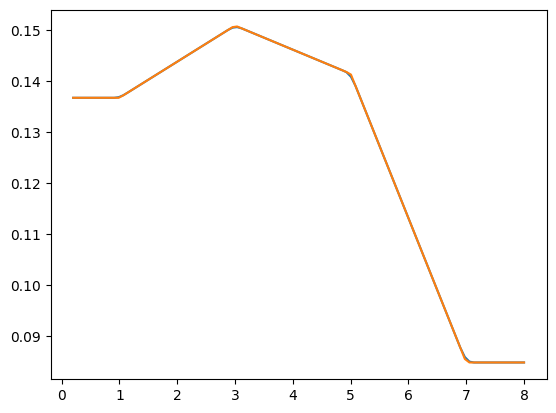

In [5]:
x_pdf, y_pdf = moe_distefano_17._get_period_pdf(np.atleast_1d(16.0))
ppf, x = moe_distefano_17._get_period_percentile_point_function(np.asarray([16]))
plt.plot(x, np.gradient(ppf.flatten(), x))
plt.plot(x_pdf, y_pdf.flatten())

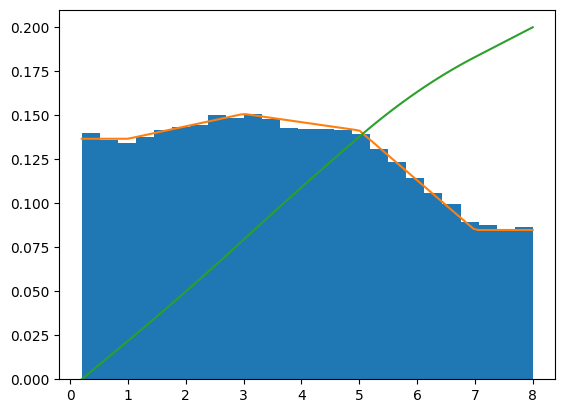

In [6]:
x, y = moe_distefano_17._get_period_pdf(np.atleast_1d(16.0))
ppf, y1 = moe_distefano_17._get_period_percentile_point_function(np.atleast_1d(16.0))
ppf = ppf.flatten()
pp = moe_distefano_17._sample_period(np.full(100000, 16))
_ = plt.hist(pp, bins=25, density=True)
plt.plot(x, y.flatten())
plt.plot(x, ppf / 5)
# plt.plot(x, np.gradient(ppf, x))

In [7]:
model = moe_distefano_17.MoeDiStefanoMultiplicityRelation()

In [8]:
masses = np.random.uniform(low=0.1, high=20, size=100000)

In [10]:
mass_ratio, period, eccentricity = model.random_binary(masses)

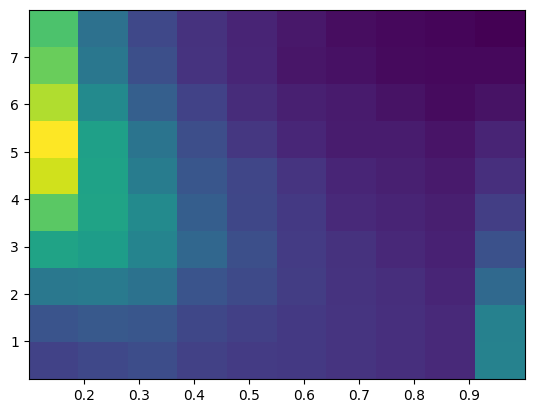

In [ ]:
_ = plt.hist2d(mass_ratio, np.log10(period))

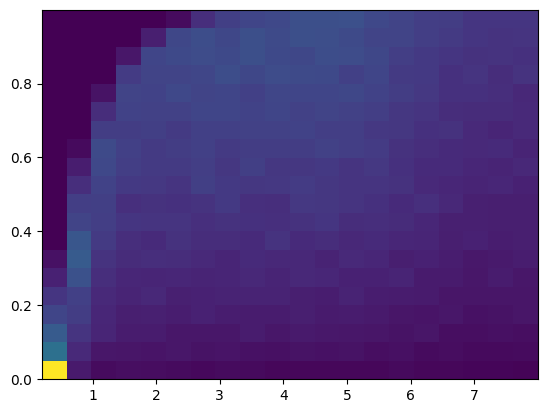

In [49]:
_ = plt.hist2d(np.log10(period), eccentricity, bins=20)

In [52]:
np.random.seed(42)
model.random_binary(masses[:10], seed=42)

(array([0.94394365, 0.66991325, 0.35863824, 0.26508398, 0.98930322,
        0.20365471, 0.28866418]),
 array([3.17552947e+06, 3.92321260e+04, 1.12824477e+07, 3.38937128e+05,
        1.20609031e+01, 5.05059564e+07, 3.46602403e+05]),
 array([0.87715898, 0.33014873, 0.29591527, 0.32269941, 0.33187267,
        0.69890144, 0.62707649]))

In [53]:
np.random.seed(42)
model.random_binary(masses[:10], seed=42)

(array([0.94394365, 0.66991325, 0.35863824, 0.26508398, 0.98930322,
        0.20365471, 0.28866418]),
 array([3.17552947e+06, 3.92321260e+04, 1.12824477e+07, 3.38937128e+05,
        1.20609031e+01, 5.05059564e+07, 3.46602403e+05]),
 array([0.87715898, 0.33014873, 0.29591527, 0.32269941, 0.33187267,
        0.69890144, 0.62707649]))